# 导入包

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

base = "/content/drive/MyDrive/Colab Notebooks/AndrewNg-Machine-Learning-Homework/ex5-Regularized-Linear-Regression-and-Bias-v.s-Variance"

# 导入数据

In [5]:
path = base + "/ex5data1.mat"
data = io.loadmat(path)
data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

# 数据切割
This dataset is divided into three parts:
+ A training set that your model will learn on: X, y
+ A cross validation set for determining the regularization parameter:
Xval, yval
+ A test set for evaluating performance. These are “unseen” examples
which your model did not see during training: Xtest, ytest

In [199]:
X = data["X"]
y = data["y"]
Xtest = data["Xtest"]
ytest = data["ytest"]
Xval = data["Xval"]
yval = data["yval"]

print("X：", X)
print("y：", y)
print("Xtest：", Xtest)
print("ytest：", ytest)
print("Xval：", Xval)
print("yval：", yval)

X： [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]
y： [[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]
Xtest： [[-33.31800399]
 [-37.91216403]
 [-51.20693795]
 [ -6.13259585]
 [ 21.26118327]
 [-40.31952949]
 [-14.54153167]
 [ 32.55976024]
 [ 13.39343255]
 [ 44.20988595]
 [ -1.14267768]
 [-12.76686065]
 [ 34.05450539]
 [ 39.22350028]
 [  1.97449674]
 [ 29.6217551 ]
 [-23.66962971]
 [ -9.01180139]
 [-55.94057091]
 [-35.70859752]
 [  9.51020533]]
ytest： [[ 3.31688953]
 [ 5.39768952]
 [ 0.13042984]
 [ 6.1925982 ]
 [17.08848712]
 [ 0.79950805]
 [ 2.82479183]
 [28.62123334]
 [17.04639081]
 [55.38437334]
 [ 4.07936733]
 [ 8.27039793]
 [31.32355102]
 [39.15906103]
 [ 8.08727989]
 [24.11134389]
 [ 2.4773548 ]
 [ 6.56606472]

# 正则化的线性回归

## 数据可视化

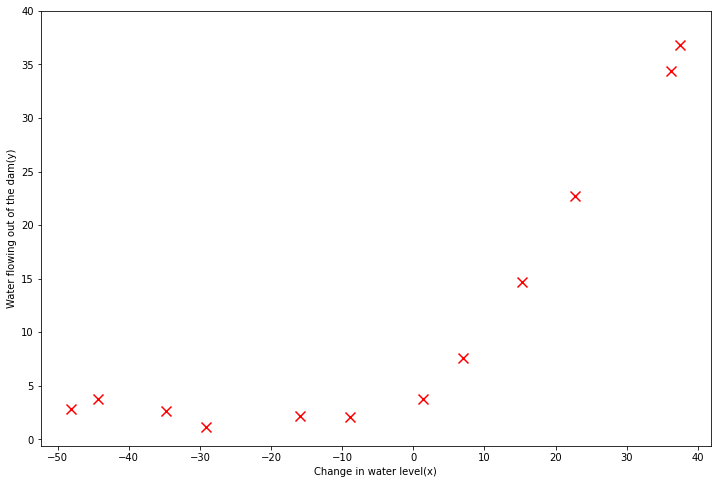

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, y, color="r", s=100, marker="x")
ax.set_xlabel("Change in water level(x)")
ax.set_ylabel("Water flowing out of the dam(y)")
plt.xticks(np.arange(-50, 41, 10))
plt.yticks(np.arange(0, 41, 5))
plt.show()

## 线性回归假设函数
实现公式：
$$
h_\theta(x)=X \theta 
$$

In [17]:
def Hypothesis(X, theta):
  # X - (m, n+1)
  # theta - (n+1, 1)
  return X @ theta

## 正则化的线性回归代价函数
公式：
$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\frac{\lambda}{2m}\sum_{i=1}^n\theta_j^2
$$

***
实现公式：
$$
J(\theta)=\frac{1}{2m}(h_\theta(X)-y)^T(h_\theta(X)-y)+\frac{\lambda}{2m}\theta^T\theta
$$

In [31]:
def ComputeLinearRegressionCostReg(X, y, theta, lambd):
  m = X.shape[0]
  y_hat = Hypothesis(X, theta)
  
  first = (y_hat - y).T @ (y_hat - y) / (2*m)
  reg = lambd * (theta.T @ theta) / (2*m)

  ret = (float)(first + reg)
  return ret

In [35]:
X_insert = np.insert(X, 0, values=1, axis=1)
theta = np.ones([X_insert.shape[1], 1])
lambd = 1

ComputeLinearRegressionCostReg(X_insert, y, theta, lambd)

304.0348588869309

## 正则化的线性回归梯度
公式：
$$
\begin{aligned}
\frac{\partial J(\theta )}{\partial \theta _0} &=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ for\ j = 0\\
\frac{\partial J(\theta )}{\partial \theta _0} &=(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} )+\frac{\lambda }{m}\theta _j\ \ \ for\ j \ge 1
\end{aligned}
$$

***
实现公式：
$$
\frac{\partial J(\theta )}{\partial \theta} = \frac{1}{m}X^T(h_\theta(X)-y)+\frac{\lambda}{m}\Theta
$$

其中：$\Theta = \begin{bmatrix}
0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}_{(n+1)\times 1}$

In [33]:
def ComputeLinearRegressionGradientReg(X, y, theta, lambd):
  m = X.shape[0]
  y_hat = Hypothesis(X, theta)
  
  Theta = np.insert(theta, 0, values=0, axis=0)

  first = X.T @ (y_hat - y) / m
  reg = lambd * theta / m

  return first + reg

In [34]:
X_insert = np.insert(X, 0, values=1, axis=1)
theta = np.ones([X_insert.shape[1], 1])
lambd = 1

ComputeLinearRegressionGradientReg(X_insert, y, theta, lambd)

array([[-15.21968234],
       [598.25074417]])

## 梯度下降

In [56]:
def trainLinearReg(X, y, theta, lambd, Iterations, LearningRate):
  cost = np.zeros(Iterations)
  for i in range(Iterations):
    theta -= LearningRate * ComputeLinearRegressionGradientReg(X, y, theta, lambd)
    cost[i] = ComputeLinearRegressionCostReg(X, y, theta, lambd)

  return theta, cost

In [69]:
X_insert = np.insert(X, 0, values=1, axis=1)
theta = np.zeros([X_insert.shape[1], 1])
lambd = 0
Iterations = 1500
LearningRate = 0.002

theta, cost = trainLinearReg(X_insert, y, theta, lambd, Iterations, LearningRate)
print(cost)

[122.41100343 113.21624483 108.57499107 ...  22.62165771  22.62069786
  22.61974173]


## 可视化拟合曲线

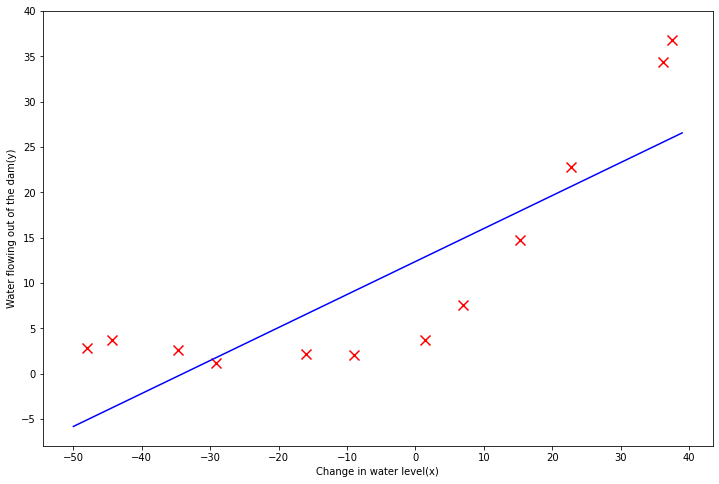

In [77]:
x = np.arange(-50, 40, 1)
f = theta[0] + theta[1] * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, y, color="r", s=100, marker="x")
ax.plot(x, f, color="Blue")
ax.set_xlabel("Change in water level(x)")
ax.set_ylabel("Water flowing out of the dam(y)")
plt.xticks(np.arange(-50, 41, 10))
plt.yticks(np.arange(-5, 41, 5))
plt.show()

# 偏差和方差

## 学习曲线
改变训练集的大小传入梯度下降中进行训练，得到theta参数，在整个验证集上计算验证误差。


### 代价函数
$$
J_{\text {train }}(\theta)=\frac{1}{2 m}\left[\sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}\right]
$$

In [80]:
def ComputeLinearRegressionCost(X, y, theta):
  m = X.shape[0]
  y_hat = Hypothesis(X, theta)
  
  return (y_hat - y).T @ (y_hat - y) / (2*m)

### 梯度下降

In [194]:
def runGradientDescent(X_insert, y, lambd):
  theta = np.zeros([X_insert.shape[1], 1])
  Iterations = 1500
  LearningRate = 0.001

  theta, cost = trainLinearReg(X_insert, y, theta, lambd, Iterations, LearningRate)
  return theta

### 绘制学习曲线

In [192]:
def plotLearningCurve(X, y, Xval, yval, lambd):
  trainCost = np.zeros(X.shape[0] + 1)
  valCost = np.zeros(X.shape[0] + 1)

  for i in range(1, X.shape[0] + 1):
    theta = runGradientDescent(X[:i,], y[:i,], lambd)
    
    trainCost[i] = ComputeLinearRegressionCost(X[:i,], y[:i,], theta)
    valCost[i] = ComputeLinearRegressionCost(Xval, yval, theta)

  return trainCost, valCost

In [195]:
X_insert = np.insert(X, 0, values=1, axis=1)
Xval_insert = np.insert(Xval, 0, values=1, axis=1)

trainCost, valCost = plotLearningCurve(X_insert, y, Xval_insert, yval, lambd=0)
trainCost, valCost

(array([0.00000000e+00, 9.86076132e-32, 3.37981436e-01, 8.37840382e+00,
        8.74821265e+00, 2.07047329e+01, 2.56044855e+01, 2.51971047e+01,
        2.38993693e+01, 2.72878443e+01, 2.89066385e+01, 2.90573070e+01,
        2.68990261e+01]),
 array([  0.        , 205.12109575, 172.06364052,  51.28955084,
         62.56973025,  32.93770341,  36.43159646,  38.02190964,
         35.47596499,  38.86409355,  36.37545074,  38.79119973,
         37.74535003]))

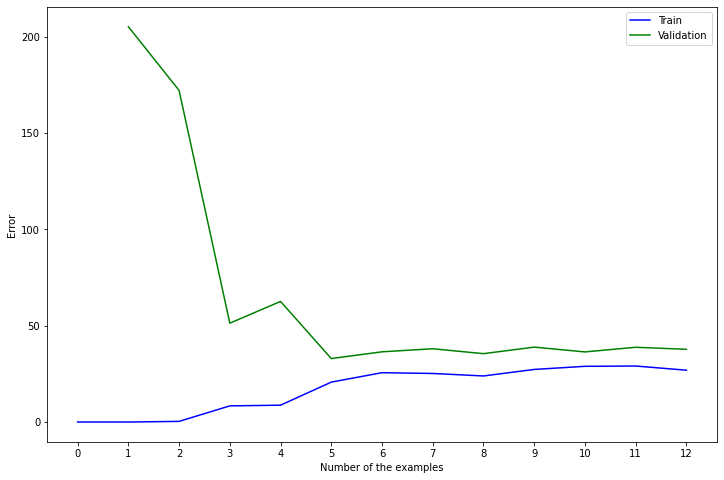

In [196]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(X.shape[0] + 1), trainCost, color="blue", label="Train")
ax.plot(np.arange(1, X.shape[0] + 1), valCost[1:,], color="green", label="Validation")
ax.legend()
ax.set_xlabel("Number of the examples")
ax.set_ylabel("Error")
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(0, 201, 50))
plt.show()